In [1]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [2]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 119kB/s 
     |████████████████████████████████| 3.8MB 28.6MB/s 
     |████████████████████████████████| 450kB 31.0MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [3]:
import tensorflow as tf

tf.__version__

'2.0.0'

In [0]:
from tensorflow import keras

In [5]:
fashion_mnist=keras.datasets.fashion_mnist
(trainx,trainy),(testx,testy)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
trainx.shape

(60000, 28, 28)

In [7]:
type(trainx)

numpy.ndarray

In [8]:
trainy.shape

(60000,)

In [9]:
testx.shape

(10000, 28, 28)

In [10]:
testy.shape

(10000,)

In [0]:
trainx,testx=trainx/255.0,testx/255.0

In [14]:
trainx.shape

(60000, 28, 28)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [0]:
model=Sequential()

In [0]:
model.add(Flatten(input_shape=[28,28]))

In [0]:
from tensorflow.keras.layers import Dropout
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers

In [0]:
weights,bias=model.layers[1].get_weights()

In [25]:
weights.shape

(784, 300)

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',#always scale values when using sgd
              metrics=['accuracy'])

In [47]:
history=model.fit(trainx,trainy,epochs=40,validation_data=[testx,testy])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 9s 150us/sample - loss: 0.7838 - accuracy: 0.7380 - val_loss: 0.5475 - val_accuracy: 0.8067
Epoch 2/40
60000/60000 [==============================] - 8s 138us/sample - loss: 0.5174 - accuracy: 0.8207 - val_loss: 0.4762 - val_accuracy: 0.8319
Epoch 3/40
60000/60000 [==============================] - 9s 148us/sample - loss: 0.4629 - accuracy: 0.8386 - val_loss: 0.4427 - val_accuracy: 0.8420
Epoch 4/40
60000/60000 [==============================] - 12s 194us/sample - loss: 0.4289 - accuracy: 0.8490 - val_loss: 0.4275 - val_accuracy: 0.8483
Epoch 5/40
60000/60000 [==============================] - 11s 176us/sample - loss: 0.4062 - accuracy: 0.8561 - val_loss: 0.4069 - val_accuracy: 0.8532
Epoch 6/40
60000/60000 [==============================] - 11s 176us/sample - loss: 0.3875 - accuracy: 0.8621 - val_loss: 0.4007 - val_accuracy: 0.8556
Epoch 7/40
60000/60000 [=======================

In [33]:
print(type(history.history)) #dictionary

<class 'dict'>


In [0]:
accuracies=history.history['accuracy']
valacc=history.history['val_accuracy']

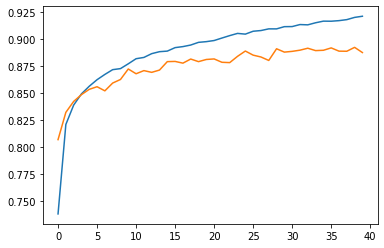

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(accuracies)
plt.plot(valacc)

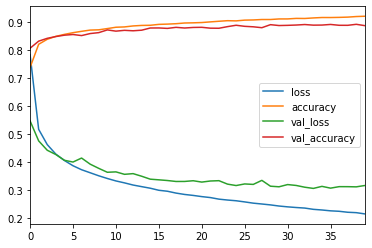

In [51]:
import pandas as pd

df=pd.DataFrame(history.history)
df.plot(kind='line')

## Same model using the keras functional API

In [0]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model

input_layer=Input(shape=[28,28])
flatten_layer=Flatten()(input_layer)
dense_1=Dense(units=300,activation='relu')(flatten_layer)
dense_2=Dense(units=100,activation='relu')(dense_1)
output_layer=Dense(units=10,activation='softmax')(dense_2)

model=Model(input_layer,output_layer)

In [53]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [56]:
history=model.fit(trainx,trainy,epochs=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 170us/sample - loss: 0.4743 - accuracy: 0.8342 - val_loss: 0.4693 - val_accuracy: 0.8355
Epoch 2/10
48000/48000 [==============================] - 9s 182us/sample - loss: 0.4385 - accuracy: 0.8461 - val_loss: 0.4247 - val_accuracy: 0.8513
Epoch 3/10
48000/48000 [==============================] - 7s 148us/sample - loss: 0.4153 - accuracy: 0.8547 - val_loss: 0.4064 - val_accuracy: 0.8583
Epoch 4/10
48000/48000 [==============================] - 8s 170us/sample - loss: 0.3976 - accuracy: 0.8614 - val_loss: 0.4005 - val_accuracy: 0.8569
Epoch 5/10
48000/48000 [==============================] - 8s 159us/sample - loss: 0.3807 - accuracy: 0.8674 - val_loss: 0.4064 - val_accuracy: 0.8596
Epoch 6/10
48000/48000 [==============================] - 7s 149us/sample - loss: 0.3687 - accuracy: 0.8702 - val_loss: 0.3951 - val_accuracy: 0.8600
Epoch 7/10
48000/48000 [==========================

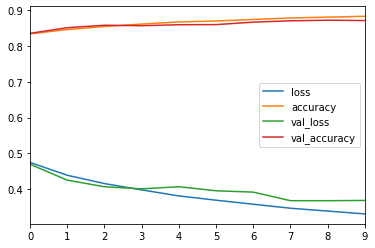

In [57]:
pd.DataFrame(history.history).plot(kind='line')